In [1]:
# Checking the environment
import sys
import cv2
import numpy as np

print("Python version : {0} ".format(sys.version))
print("OpenCV version : {0} ".format(cv2.__version__))
print("Numpy version  : {0}".format(np.__version__))


Python version : 3.6.1 (default, Apr  4 2017, 09:40:21) 
[GCC 4.2.1 Compatible Apple LLVM 8.1.0 (clang-802.0.38)] 
OpenCV version : 3.2.0-dev 
Numpy version  : 1.12.1


<IPython.core.display.Javascript object>


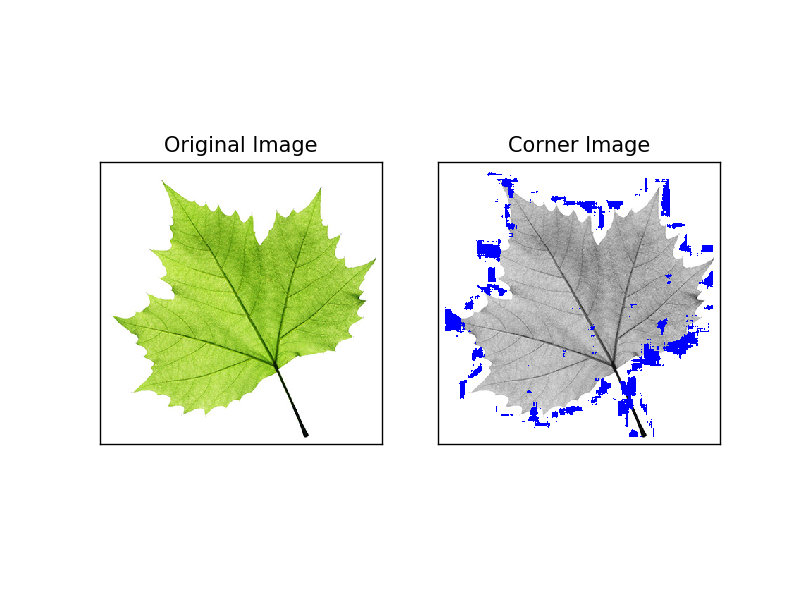

In [2]:
# Implementing Harris Corner Detection from Scratch

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

def findCorners(img, window_size=5, k=0.04, thresh=10000):
    """
    Finds and returns list of corners and new image with corners drawn
    :param img: The original image
    :param window_size: The size (side length) of the sliding window
    :param k: Harris corner constant. Usually 0.04 - 0.06
    :param thresh: The threshold above which a corner is counted
    :return:
    """
    
    #Find x and y derivatives
    dy, dx = np.gradient(img)
    Ixx = dx**2
    Ixy = dy*dx
    Iyy = dy**2
    height = img.shape[0]
    width = img.shape[1]
    
    newImg = img.copy()
    color_img = cv2.cvtColor(newImg, cv2.COLOR_GRAY2RGB)
    offset = int(window_size/2)

    #Loop through image and find our corners
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            #Calculate sum of squares
            windowIxx = Ixx[y-offset:y+offset+1, x-offset:x+offset+1]
            windowIxy = Ixy[y-offset:y+offset+1, x-offset:x+offset+1]
            windowIyy = Iyy[y-offset:y+offset+1, x-offset:x+offset+1]
            Sxx = windowIxx.sum()
            Sxy = windowIxy.sum()
            Syy = windowIyy.sum()

            #Find determinant and trace, use to get corner response
            det = (Sxx * Syy) - (Sxy**2)
            trace = Sxx + Syy
            R = det - k*(trace**2)

            #If corner response is over threshold, color the point
            if R > thresh:
                color_img.itemset((y, x, 0), 0)
                color_img.itemset((y, x, 1), 0)
                color_img.itemset((y, x, 2), 255)
    return color_img

IMG = os.path.join("resources","images","leaf.jpg")

img = mpimg.imread(IMG)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

res = findCorners(gray, 20, 0.2, 10000)

plt.subplot(121)
plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.subplot(122)
plt.title("Corner Image")
plt.xticks([]), plt.yticks([])
plt.imshow(res)

plt.show()



<IPython.core.display.Javascript object>


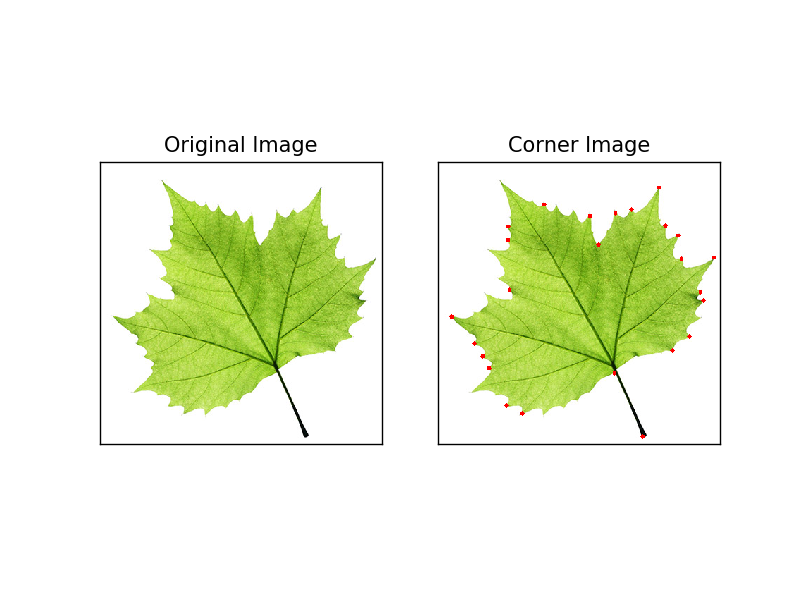

In [5]:
# Corner Detection using Harris-Shi-Tomasi Feature Detector 

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

IMG = os.path.join("resources","images","leaf.jpg")
img = mpimg.imread(IMG)
copy = img.copy()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(copy,(x,y),3,255,-1)

plt.figure("Harri-Shi-Tomasi Feature Detector")


plt.subplot(121)
plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.subplot(122)
plt.title("Corner Image")
plt.xticks([]), plt.yticks([])
plt.imshow(copy)

plt.show()



<IPython.core.display.Javascript object>


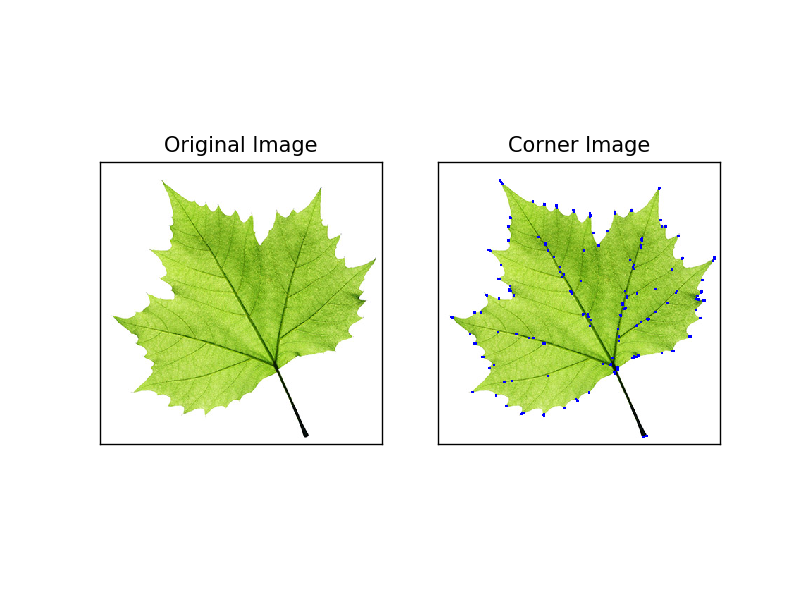

In [3]:
# Harris Corner Detection using OpenCV
# using cv2.cornerHarris()  

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

IMG = os.path.join("resources","images","leaf.jpg")
img = mpimg.imread(IMG)
copy = img.copy()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
copy[dst>0.01*dst.max()]=[0,0,255]

plt.subplot(121)
plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.subplot(122)
plt.title("Corner Image")
plt.xticks([]), plt.yticks([])
plt.imshow(copy)

plt.show()



<IPython.core.display.Javascript object>


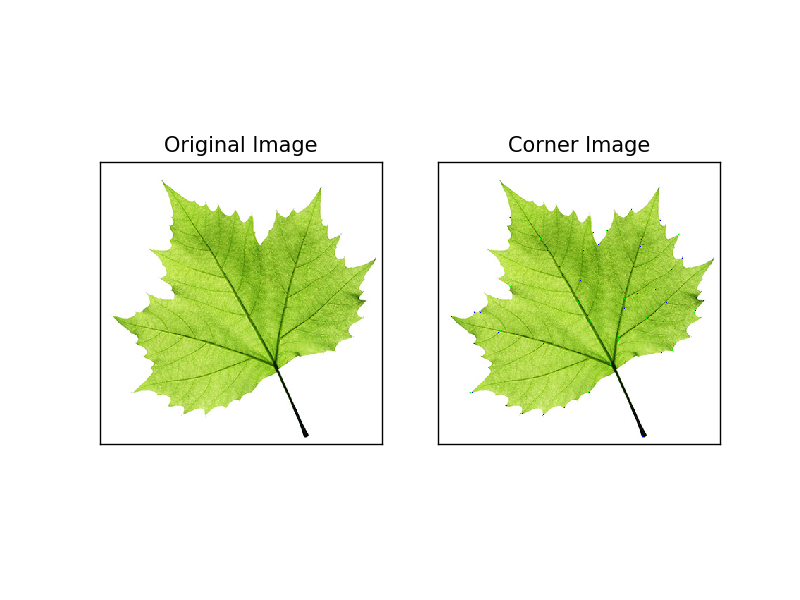

In [4]:
# Harris Corner Detection using OpenCV with Sub-Pixel Accuracy
# using cv2.cornerSubPix()  & cv2.connectedComponentsWithStats

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

IMG = os.path.join("resources","images","leaf.jpg")
img = mpimg.imread(IMG)
copy = img.copy()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

# Now draw them
# the blue points are really small use cv2.circle to make them visible
res = np.hstack((centroids,corners))
res = np.int0(res)
copy[res[:,1],res[:,0]]=[0,0,255]
copy[res[:,3],res[:,2]] = [0,255,0]



plt.subplot(121)
plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.subplot(122)
plt.title("Corner Image")
plt.xticks([]), plt.yticks([])
plt.imshow(copy)

plt.show()

<IPython.core.display.Javascript object>


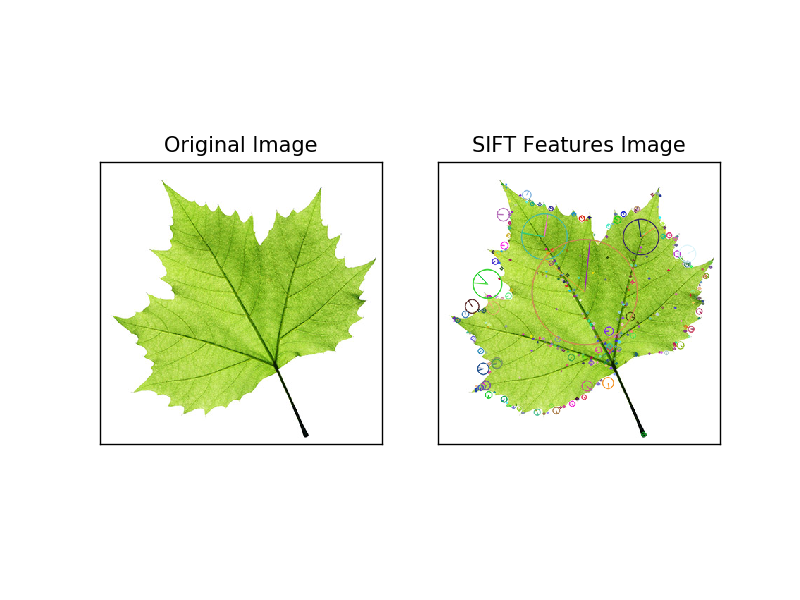

In [8]:
# SIFT - Scale Invariant Feature Transform Example

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

IMG = os.path.join("resources","images","leaf.jpg")
img = mpimg.imread(IMG)
copy = img.copy()

gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)

cv2.drawKeypoints(copy,kp,copy,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure("SIFT Features")

plt.subplot(121)
plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.subplot(122)
plt.title("SIFT Features Image")
plt.xticks([]), plt.yticks([])
plt.imshow(copy)

plt.show()

<IPython.core.display.Javascript object>


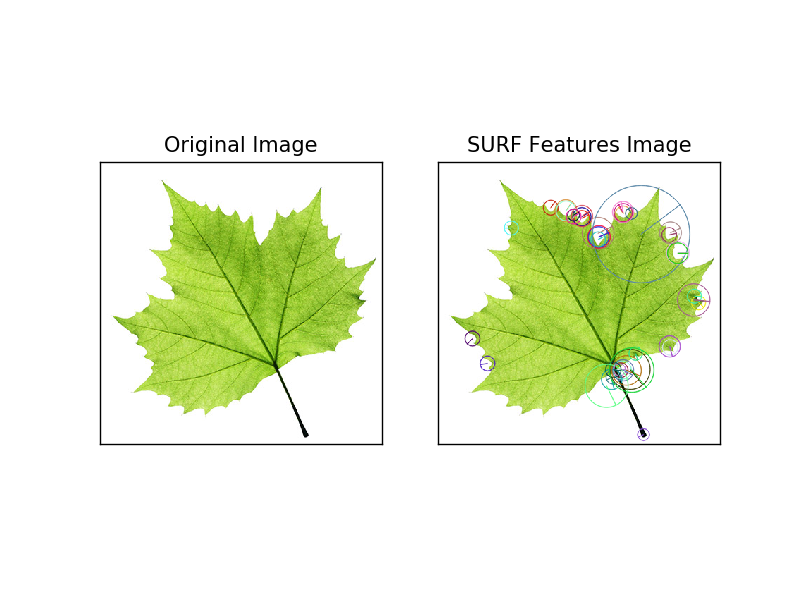

In [30]:
# SURF - Speed-Up Robust Features

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

IMG = os.path.join("resources","images","leaf.jpg")
img = mpimg.imread(IMG)
copy = img.copy()

# Create SURF object. You can specify params here or later.
# Here I set Hessian Threshold to 1000
surf = cv2.xfeatures2d.SURF_create(5000)

# Find keypoints and descriptors directly
kp, des = surf.detectAndCompute(img,None)

cv2.drawKeypoints(copy,kp,copy, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure("SURF Features")

plt.subplot(121)
plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.subplot(122)
plt.title("SURF Features Image")
plt.xticks([]), plt.yticks([])
plt.imshow(copy)

plt.show()

Threshold:  10
nonmaxSuppression:  True
neighborhood:  2
Total Keypoints with nonmaxSuppression:  3575
Total Keypoints without nonmaxSuppression:  7909


<IPython.core.display.Javascript object>


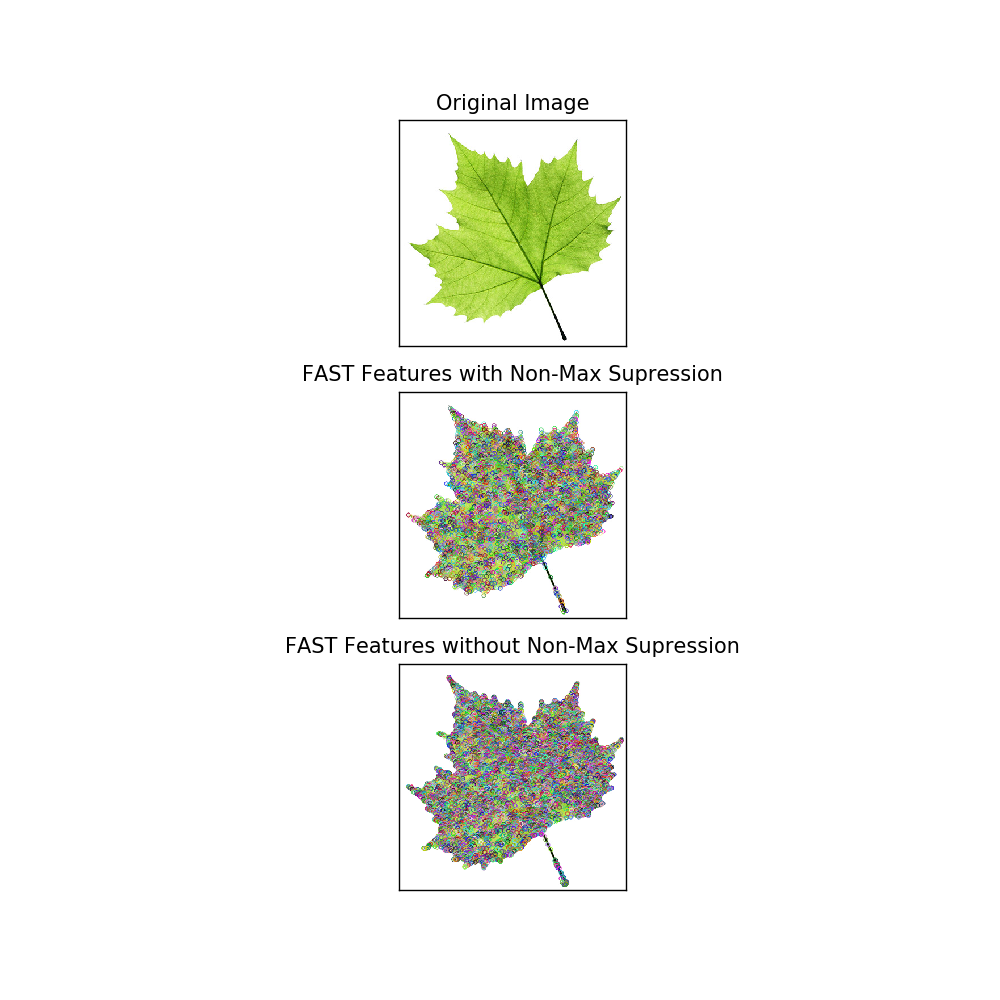

In [31]:
# FAST - Features from Accelerated Segment Test

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

IMG = os.path.join("resources","images","leaf.jpg")
img = mpimg.imread(IMG)

# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()
# find and draw the keypoints
kp = fast.detect(img,None)

img2 = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Print all default params
print("Threshold: ", fast.getThreshold())
print("nonmaxSuppression: ", fast.getNonmaxSuppression())
print("neighborhood: ", fast.getType())
print("Total Keypoints with nonmaxSuppression: ", len(kp))

# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img,None)
print("Total Keypoints without nonmaxSuppression: ", len(kp))

img3 = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure("FAST Features",figsize=(8,8))

plt.subplot(311)
plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.subplot(312)
plt.title("FAST Features with Non-Max Supression")
plt.xticks([]), plt.yticks([])
plt.imshow(img2)

plt.subplot(313)
plt.title("FAST Features without Non-Max Supression")
plt.xticks([]), plt.yticks([])
plt.imshow(img3)

plt.show()

Descriptor Size :  32
Descriptor Shape :  (73, 32)


<IPython.core.display.Javascript object>


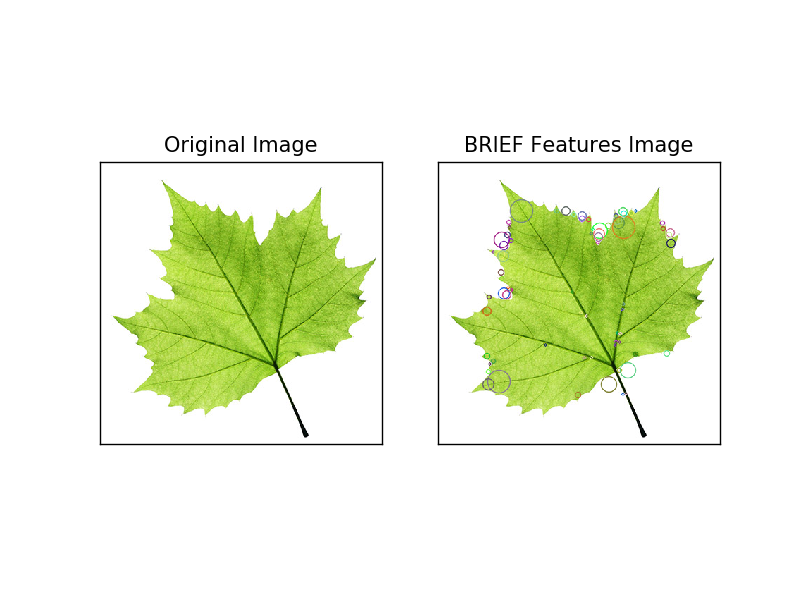

In [32]:
# BRIEF - Binary Robust Independent Elementary Features

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

IMG = os.path.join("resources","images","leaf.jpg")
img = mpimg.imread(IMG)

# Making a copy of the original image
copy = img.copy()

# Initiate FAST detector
star = cv2.xfeatures2d.StarDetector_create()

# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# find the keypoints with STAR
kp = star.detect(img,None)

# compute the descriptors with BRIEF
kp, des = brief.compute(img, kp)

print("Descriptor Size : ", brief.descriptorSize())
print("Descriptor Shape : ", des.shape)

cv2.drawKeypoints(copy,kp,copy,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure("BRIEF Features")

plt.subplot(121)
plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.subplot(122)
plt.title("BRIEF Features Image")
plt.xticks([]), plt.yticks([])
plt.imshow(copy)

plt.show()

<IPython.core.display.Javascript object>


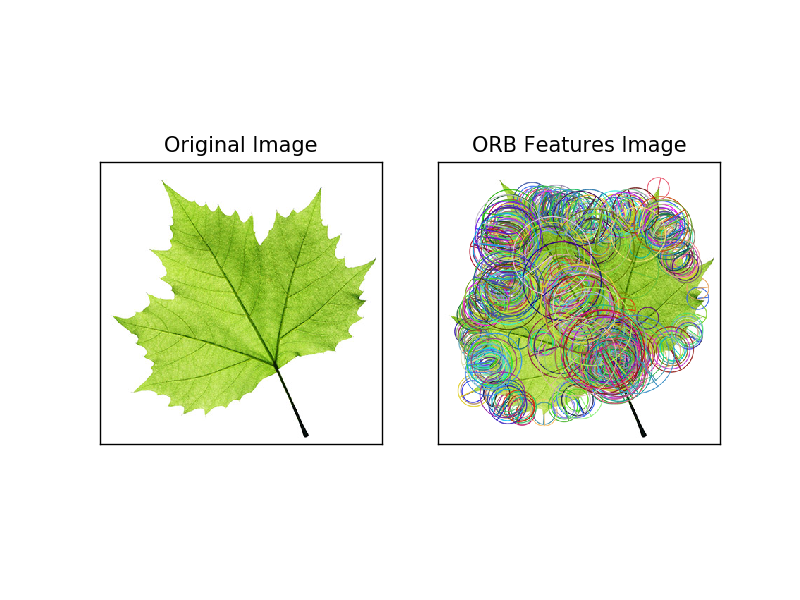

In [33]:
# ORB - Oriented FAST and Rotated BRIEF

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

IMG = os.path.join("resources","images","leaf.jpg")
img = mpimg.imread(IMG)

# Making a copy of the original image
copy = img.copy()

# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints with ORB
kp = orb.detect(img,None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

# draw only keypoints location,not size and orientation
cv2.drawKeypoints(img, kp, copy, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure("ORB Features")

plt.subplot(121)
plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.subplot(122)
plt.title("ORB Features Image")
plt.xticks([]), plt.yticks([])
plt.imshow(copy)

plt.show()

In [44]:
# Brute-Force Matcher - Best Match Example

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

# query image
IMG  = os.path.join("resources","images","box.png")
img1 = cv2.imread(IMG)
copy1 = img1.copy()

# train image
IMG2 = os.path.join("resources","images","box_in_scene.png")
img2 = cv2.imread(IMG2)
copy1 = img1.copy()


# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(copy1,None)
kp2, des2 = orb.detectAndCompute(copy2,None)


# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = None
cv2.drawMatches(copy1,kp1,copy2,kp2,matches[:10],img3,flags=2)

plt.figure("BFMatcher - Best Match",figsize=(8,8))

plt.subplot(311)
plt.title("Query Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.subplot(312)
plt.title("Train Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img2)

plt.subplot(313)
plt.title("Best BFMatched Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img3)

plt.show()


(223, 324)
(384, 512, 3)


'\n# find the keypoints and descriptors with ORB\nkp1, des1 = orb.detectAndCompute(copy1,None)\nkp2, des2 = orb.detectAndCompute(copy2,None)\n\n\n# create BFMatcher object\nbf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)\n\n# Match descriptors.\nmatches = bf.match(des1,des2)\n\n# Sort them in the order of their distance.\nmatches = sorted(matches, key = lambda x:x.distance)\n\n# Draw first 10 matches.\nimg3 = None\ncv2.drawMatches(copy1,kp1,copy2,kp2,matches[:10],img3,flags=2)\n\nplt.figure("BFMatcher - Best Match",figsize=(8,8))\n\nplt.subplot(311)\nplt.title("Query Image")\nplt.xticks([]), plt.yticks([])\nplt.imshow(img)\n\nplt.subplot(312)\nplt.title("Train Image")\nplt.xticks([]), plt.yticks([])\nplt.imshow(img2)\n\nplt.subplot(313)\nplt.title("Best BFMatched Image")\nplt.xticks([]), plt.yticks([])\nplt.imshow(img3)\n\nplt.show()\n\n'